In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cbuckle = pd.read_csv("data/cbuckle_error_iter_analysis_large.csv")
cbuckle.head()

,mat_name,errorfree_iterations,tol,maxiter,error_pos,error_iter,solve_iterations,final_relres,did_converge,realtime_s,pos_2norm,n_rows,slowdown
0,cbuckle.mat,341,0.000001,34100,1769,1,919,9.977788e-07,True,0.599642,29270.744104,13681,2.695015
1,cbuckle.mat,341,0.000001,34100,1769,85,5767,9.926685e-07,True,3.797579,29270.744104,13681,16.912023
2,cbuckle.mat,341,0.000001,34100,1769,170,14603,9.977197e-07,True,9.563869,29270.744104,13681,42.824047
3,cbuckle.mat,341,0.000001,34100,1769,255,11554,9.967789e-07,True,7.583693,29270.744104,13681,33.882698
4,cbuckle.mat,341,0.000001,34100,1769,340,2889,9.998129e-07,True,1.927457,29270.744104,13681,8.472141


In [3]:
bcsstk18 = pd.read_csv("data/bcsstk18_error_iter_analysis_large.csv")
bcsstk18.head()

,mat_name,errorfree_iterations,tol,maxiter,error_pos,error_iter,solve_iterations,final_relres,did_converge,realtime_s,pos_2norm,n_rows,slowdown
0,bcsstk18.mat,432,0.000001,43200,6807,1,471,9.532263e-07,True,0.170828,1.486519e+06,11948,1.090278
1,bcsstk18.mat,432,0.000001,43200,6807,108,1252,9.916959e-07,True,0.456197,1.486519e+06,11948,2.898148
2,bcsstk18.mat,432,0.000001,43200,6807,216,595,9.717958e-07,True,0.216323,1.486519e+06,11948,1.377315
3,bcsstk18.mat,432,0.000001,43200,6807,324,550,9.834833e-07,True,0.199969,1.486519e+06,11948,1.273148
4,bcsstk18.mat,432,0.000001,43200,6807,431,439,9.907264e-07,True,0.158494,1.486519e+06,11948,1.016204


In [4]:
g_cbuckle = cbuckle.groupby("error_iter")
iters_cbuckle = cbuckle["errorfree_iterations"].min()  # all same value
g_bcsstk18 = bcsstk18.groupby("error_iter")
iters_bcsstk18 = bcsstk18["errorfree_iterations"].min()  # all same value
cs = ["red", "green", "blue", "orange", "magenta"]
ms = ["o", "v", "^", "<", ">"]

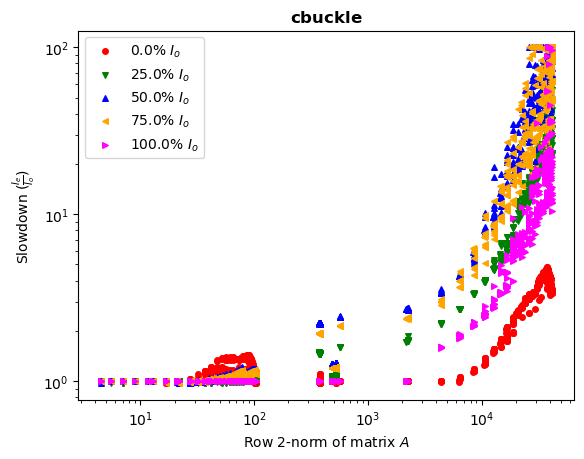

In [5]:
plt.title(r"$\bf cbuckle$")
plt.xlabel("Row 2-norm of matrix $A$")
plt.xscale("log")
plt.ylabel("Slowdown $(\\frac{I_e}{I_o})$")
plt.yscale("log")

for i, (gname, data) in enumerate(g_cbuckle):
    plt.scatter(data["pos_2norm"], data["solve_iterations"] / data["errorfree_iterations"],
                c=cs[i], marker=ms[i], s=16, label=f"{round(gname / iters_cbuckle, 2)*100}% $I_o$")

plt.legend()
plt.show()

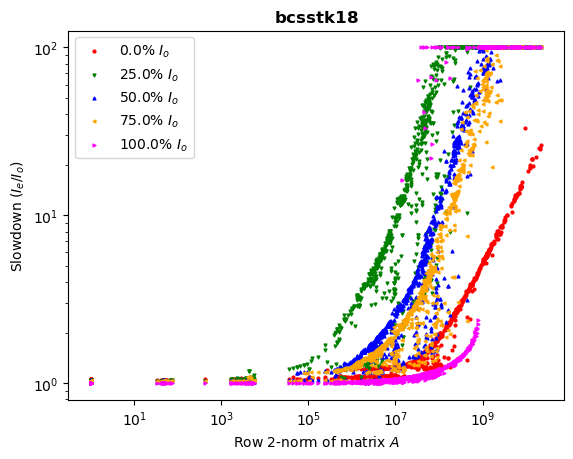

In [6]:
plt.title(r"$\bf bcsstk18$")
plt.xlabel("Row 2-norm of matrix $A$")
plt.xscale("log")
plt.ylabel("Slowdown ($I_e$/$I_o$)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_bcsstk18):
    plt.scatter(data["pos_2norm"], data["solve_iterations"] / data["errorfree_iterations"],
                c=cs[i], marker=ms[i], s=4, label=f"{round(gname / iters_bcsstk18, 2)*100}% $I_o$")

plt.legend()
plt.show()

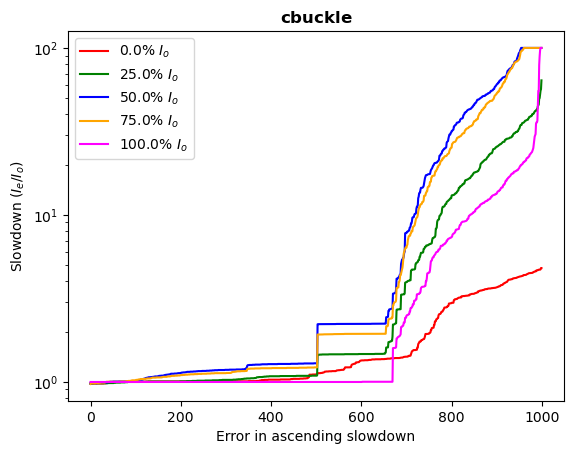

In [7]:
plt.title(r"$\bf cbuckle$")
plt.xlabel("Error in ascending slowdown")
plt.ylabel("Slowdown ($I_e$/$I_o$)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_cbuckle):
    s = data[["solve_iterations", "errorfree_iterations"]].sort_values("solve_iterations")
    plt.plot(range(len(data)), s["solve_iterations"] / s["errorfree_iterations"],
                c=cs[i], label=f"{round(gname / iters_cbuckle, 2)*100}% $I_o$")

plt.legend()
plt.show()

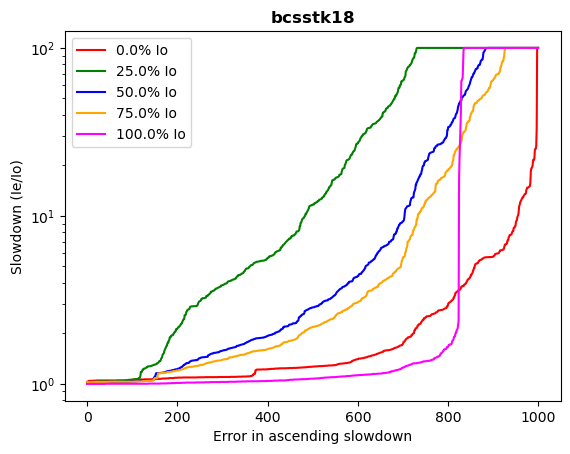

In [8]:
plt.title(r"$\bf bcsstk18$")
plt.xlabel("Error in ascending slowdown")
plt.ylabel("Slowdown (Ie/Io)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_bcsstk18):
    s = data[["solve_iterations", "errorfree_iterations"]].sort_values("solve_iterations")
    plt.plot(range(len(data)), s["solve_iterations"] / s["errorfree_iterations"],
                c=cs[i], label=f"{round(gname / iters_bcsstk18, 2)*100}% Io")

plt.legend()
plt.show()